In [1]:
# https://www.jejudatahub.net/
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')

In [2]:
jeju_df = pd.read_csv('data/jeju_card.csv')
jeju_df.sort_values(by='연월', inplace=True)
jeju_df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
19572,제주도,서귀포시,도심,교통,내국인관광객,20대,남,2016-09,724,788,23430793
19098,제주도,제주시,도심,쇼핑,제주도민,60대이상,여,2016-09,10361,30199,1176378141
19097,제주도,제주시,도심,숙박,내국인관광객,20대,남,2016-09,510,618,40364188
19096,제주도,제주시,도심,숙박,내국인관광객,20대,여,2016-09,574,695,51154302
19095,제주도,제주시,도심,숙박,내국인관광객,30대,남,2016-09,1435,1873,165228945
...,...,...,...,...,...,...,...,...,...,...,...
443,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,남,2018-12,775,1014,72834494
442,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,여,2018-12,655,857,80525096
441,제주도,서귀포시,읍면,소매,제주도민,20대,남,2018-12,278,492,11681404
439,제주도,서귀포시,읍면,소매,제주도민,20대미만,남,2018-12,22,40,616270


In [3]:
jeju_df.info()
# 결측값은 없어보임

<class 'pandas.core.frame.DataFrame'>
Index: 19573 entries, 19572 to 0
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


In [4]:
jeju_df.describe(include='all') # include='all' : 숫자말고 다른 데이터 타입도 포함
# top = 가장 많이 등장하는 최빈값

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,제주도,제주시,도심,쇼핑,내국인관광객,20대,남,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


In [5]:
# object 타입의 column들만 출력
object_cols = jeju_df.columns[jeju_df.dtypes == 'object']
object_cols

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월'], dtype='object')

In [6]:
for col in object_cols:
    print(col)
    print(jeju_df[col].unique())
    print()

시도명
['제주도']

시군구명
['서귀포시' '제주시']

지역구분
['도심' '읍면']

업종명
['교통' '쇼핑' '숙박' '식음료' '유흥' '소매' '기타' '문화/레져']

이용자 구분
['내국인관광객' '제주도민']

연령대
['20대' '60대이상' '30대' '40대' '50대' '20 미만' '20대미만']

성별
['남' '여']

연월
['2016-09' '2016-10' '2016-11' '2016-12' '2017-01' '2017-02' '2017-03'
 '2017-04' '2017-05' '2017-06' '2017-07' '2017-08' '2017-09' '2017-10'
 '2017-11' '2017-12' '2018-01' '2018-02' '2018-03' '2018-04' '2018-05'
 '2018-06' '2018-07' '2018-08' '2018-09' '2018-10' '2018-11' '2018-12']



In [7]:
jeju_df['연월'].str.split('-', expand=True)

,0,1
19572,2016,09
19098,2016,09
19097,2016,09
19096,2016,09
19095,2016,09
...,...,...
443,2018,12
442,2018,12
441,2018,12
439,2018,12


In [8]:
# 2017년, 2018년 데이터만 추출
condition = (jeju_df['연월'].str.contains('2017')) | (jeju_df['연월'].str.contains('2018'))
jeju_df = jeju_df[condition]
jeju_df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
16225,제주도,제주시,도심,숙박,내국인관광객,40대,여,2017-01,851,1165,126969279
16226,제주도,제주시,도심,숙박,내국인관광객,40대,남,2017-01,1601,2168,235033044
16227,제주도,제주시,도심,숙박,내국인관광객,30대,여,2017-01,774,957,86832222
16231,제주도,제주시,도심,숙박,내국인관광객,20 미만,남,2017-01,6,6,428599
16229,제주도,제주시,도심,숙박,내국인관광객,20대,여,2017-01,566,655,47691443
...,...,...,...,...,...,...,...,...,...,...,...
443,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,남,2018-12,775,1014,72834494
442,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,여,2018-12,655,857,80525096
441,제주도,서귀포시,읍면,소매,제주도민,20대,남,2018-12,278,492,11681404
439,제주도,서귀포시,읍면,소매,제주도민,20대미만,남,2018-12,22,40,616270


In [9]:
for col in object_cols:
    print(col)
    print(jeju_df[col].unique())
    print()

시도명
['제주도']

시군구명
['제주시' '서귀포시']

지역구분
['도심' '읍면']

업종명
['숙박' '쇼핑' '유흥' '식음료' '교통' '소매' '기타' '문화/레져']

이용자 구분
['내국인관광객' '제주도민']

연령대
['40대' '30대' '20 미만' '20대' '50대' '60대이상' '20대미만']

성별
['여' '남']

연월
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12']



In [10]:
# '20 미만'과 '20대미만' -> '20대미만'으로 통일
jeju_df.loc[jeju_df['연령대'] == '20 미만', '연령대'] = '20대미만' 
jeju_df['연령대'].unique()

array(['40대', '30대', '20대미만', '20대', '50대', '60대이상'], dtype=object)

In [11]:
# 월별 이용자수, 이용횟수, 이용금액 출력
group_ym = jeju_df.groupby('연월').sum(numeric_only=True) # numeric_only=True : 숫자값들만 가지고 계산
group_ym

,이용자수,이용횟수,이용금액
연월,,,
2017-01,2044697,3962878,158062633602
2017-02,1937989,3686906,142673272629
2017-03,2139087,4265024,158170622304
2017-04,2261037,4428571,164145266282
2017-05,2422539,4744952,174450463090
2017-06,2328383,4606602,166023890619
2017-07,2520117,5048178,177270011408
2017-08,2634037,5212389,178853518885
2017-09,2374142,4765159,168355520204


In [12]:
# reset_index() : index를 default로 변경
group_ym.reset_index(inplace=True)
group_ym

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


<Axes: xlabel='연월', ylabel='이용금액'>

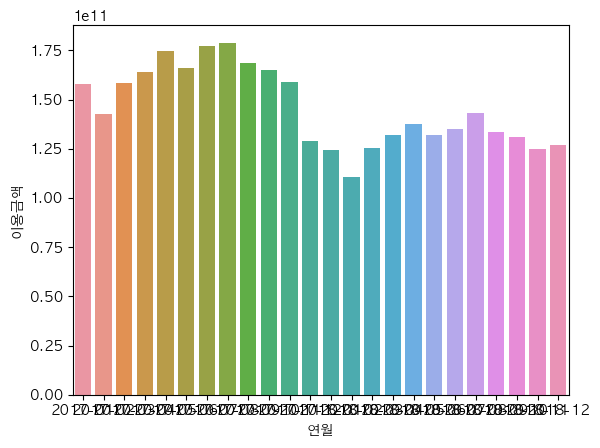

In [13]:
# 연월 vs 이용금액 바그래프 (Seaborn 사용)
sns.barplot(data=group_ym, x='연월', y='이용금액')

Text(0, 0.5, '이용금액(억)')

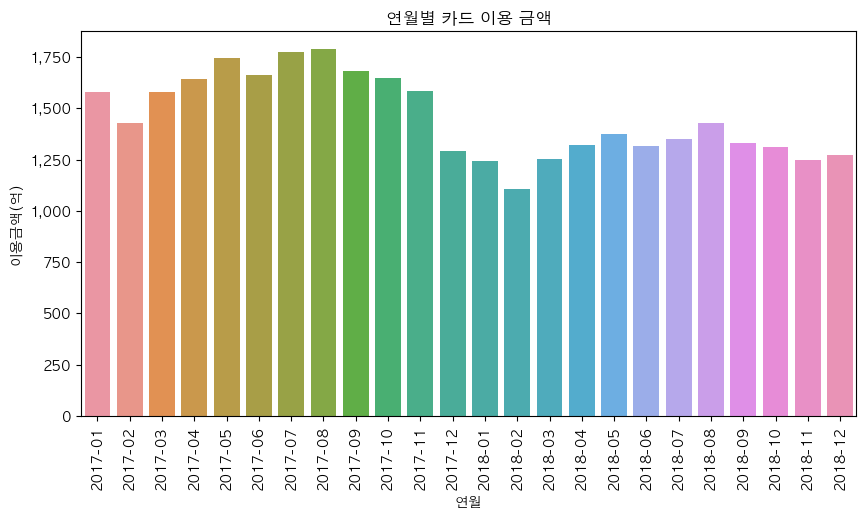

In [14]:
# 그래프 크기 가로 10인치, 세로 5인치로 변경
plt.rcParams['figure.figsize'] = (10, 5)

sns.barplot(data=group_ym, x='연월', y='이용금액')
# x축에 있는 값들 90도로 회전
plt.xticks(rotation=90)
plt.title('연월별 카드 이용 금액')
# y축에 있는 값들을 이해하기 쉬운 형태로 출력
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

# 분석: 2017년과 2018년 모두 겨울보다는 봄,여름 이용금액이 더 높음. 하지만 2018년은 2017년에 비해 전체적으로 이용금액이 줄어듦. 해당 원인을 찾아야함. 

In [15]:
# 가설 1: 2017년에 비해 이용금액이 유독 많이 줄어든 연령대가 있는지 확인

# 연도 column 추가
jeju_df['연도'] = jeju_df['연월'].str.split('-', expand=True)[0]
jeju_df

/var/folders/tm/zpn_b3h12wb5ydy7hwz3nn440000gn/T/ipykernel_18345/1516745044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeju_df['연도'] = jeju_df['연월'].str.split('-', expand=True)[0]


,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
16225,제주도,제주시,도심,숙박,내국인관광객,40대,여,2017-01,851,1165,126969279,2017
16226,제주도,제주시,도심,숙박,내국인관광객,40대,남,2017-01,1601,2168,235033044,2017
16227,제주도,제주시,도심,숙박,내국인관광객,30대,여,2017-01,774,957,86832222,2017
16231,제주도,제주시,도심,숙박,내국인관광객,20대미만,남,2017-01,6,6,428599,2017
16229,제주도,제주시,도심,숙박,내국인관광객,20대,여,2017-01,566,655,47691443,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
443,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,남,2018-12,775,1014,72834494,2018
442,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,여,2018-12,655,857,80525096,2018
441,제주도,서귀포시,읍면,소매,제주도민,20대,남,2018-12,278,492,11681404,2018
439,제주도,서귀포시,읍면,소매,제주도민,20대미만,남,2018-12,22,40,616270,2018


In [16]:
# 연도와 연령대 이용자수, 이용횟수, 이용금액 출력
group_ym_age = jeju_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
group_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4800559,9304114,208175160124
1,2017,20대미만,203078,429896,4996657612
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대,4262563,8714136,175770246392
7,2018,20대미만,216056,475236,5027234286
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

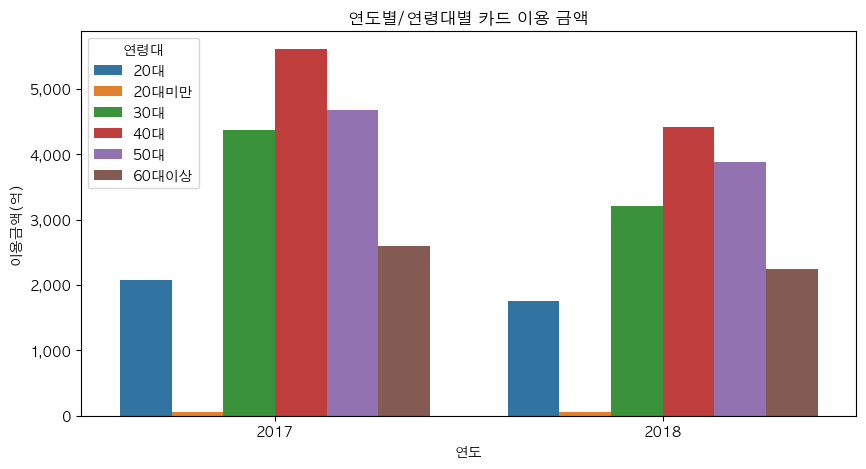

In [17]:
sns.barplot(data=group_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

# 하지만 막대의 순서가 오름차순으로 되어있지 x

In [18]:
# pd.Categorical() : 해당 column의 데이터 타입을 pandas의 category로 변경 (ordered=True를 통해 categories에 넘겨준 대로 각 값들 순서 지정) 
jeju_df['연령대'] = pd.Categorical(jeju_df['연령대'], categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'], ordered=True)

group_ym_age = jeju_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
group_ym_age

/var/folders/tm/zpn_b3h12wb5ydy7hwz3nn440000gn/T/ipykernel_18345/991147527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeju_df['연령대'] = pd.Categorical(jeju_df['연령대'], categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'], ordered=True)


,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대미만,203078,429896,4996657612
1,2017,20대,4800559,9304114,208175160124
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대미만,216056,475236,5027234286
7,2018,20대,4262563,8714136,175770246392
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

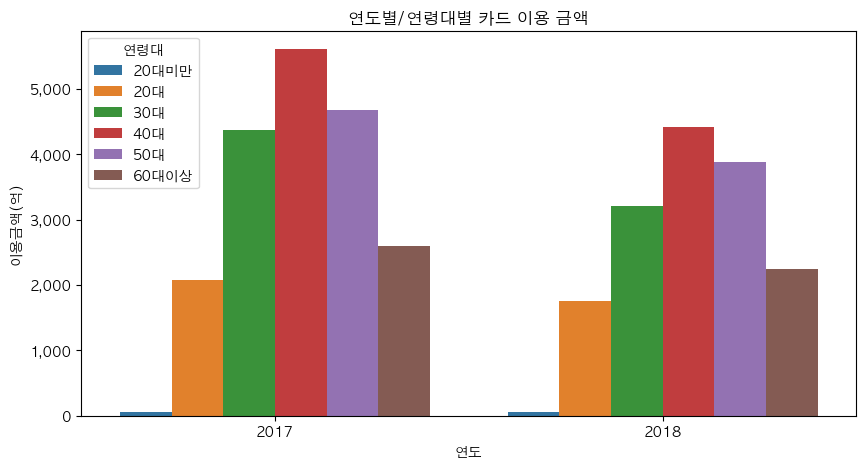

In [19]:
# 그래프 다시 출력
sns.barplot(data=group_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

# 분석: 이용 금액이 유독 많이 줄어든 연령대는 없음. 전체적으로 이용금액 감소. 연령대는 2018 이용금액 감소에 큰 상관이 없어 보임. 다른 원인을 살펴봐야함. 

In [20]:
# 가설 2: 2017년에 비해 이용금액이 유독 많이 줄어든 제주도민이나 관광객이 있는지 확인

# 연도와 이용자구분 이용자수, 이용횟수, 이용금액 출력
group_ym_user = jeju_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()
group_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

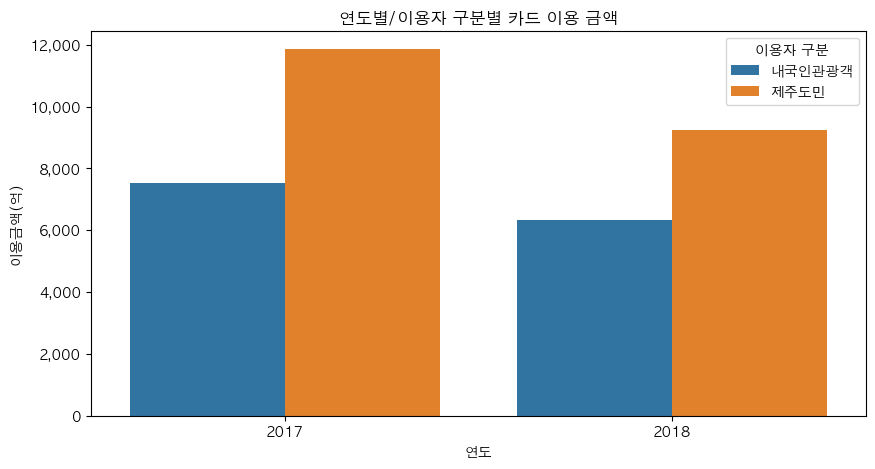

In [21]:
sns.barplot(data=group_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

# 분석: 마찬가지로 제주도민과 관광객 모두 이용금액 감소. 이용자 구분은 2018 이용금액 감소에 큰 상관이 없어 보임. 다른 원인을 살펴봐야함.  

In [22]:
# 가설 3: 2017년에 비해 이용금액이 유독 많이 줄어든 업종이 있는지 확인
group_ym_market = jeju_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()
group_ym_market

,연도,업종명,이용자수,이용횟수,이용금액
0,2017,교통,2633684,3722079,218699539949
1,2017,기타,3337625,6181588,369802572061
2,2017,문화/레져,1166072,1586218,68738522691
3,2017,소매,2543030,3557900,214293310855
4,2017,쇼핑,7840104,21230344,472376164231
5,2017,숙박,492982,658658,66183404375
6,2017,식음료,8396481,15471969,457736442355
7,2017,유흥,437629,623134,72734706220
8,2018,교통,2541600,3495487,216362078283
9,2018,문화/레져,1194976,1801581,69157584998


Text(0, 0.5, '이용금액(억)')

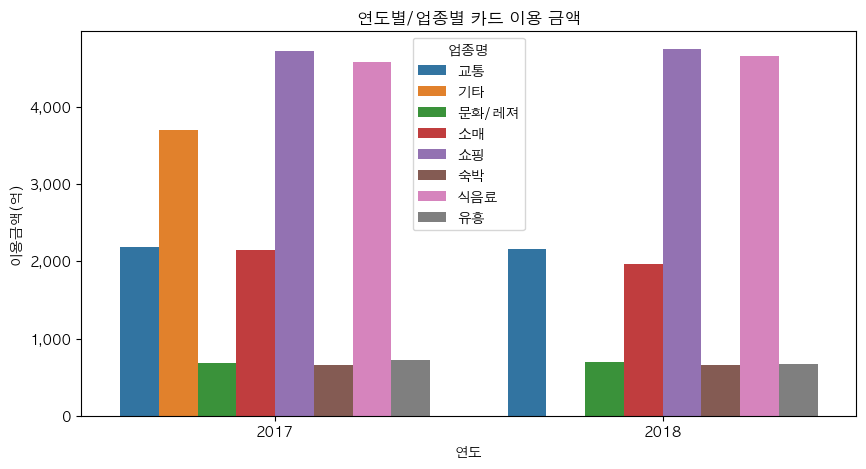

In [23]:
sns.barplot(data=group_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

# 분석: '기타' 항목이 2017년에만 있고 2018년에는 없음. 일단 해당 '기타' 데이터만 확인.

In [24]:
jeju_df[jeju_df['업종명'] == '기타']

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
16320,제주도,제주시,도심,기타,내국인관광객,40대,여,2017-01,8272,13663,875310759,2017
16319,제주도,제주시,도심,기타,내국인관광객,50대,남,2017-01,10550,20580,852466590,2017
16318,제주도,제주시,도심,기타,내국인관광객,50대,여,2017-01,4105,6828,437375705,2017
16317,제주도,제주시,도심,기타,내국인관광객,60대이상,남,2017-01,2920,5039,348926313,2017
16316,제주도,제주시,도심,기타,내국인관광객,60대이상,여,2017-01,1432,2472,134693759,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9215,제주도,서귀포시,읍면,기타,내국인관광객,20대미만,남,2017-11,34,98,726400,2017
9214,제주도,서귀포시,읍면,기타,내국인관광객,20대미만,여,2017-11,27,84,422600,2017
9213,제주도,서귀포시,읍면,기타,내국인관광객,20대,남,2017-11,650,828,17976440,2017
9212,제주도,서귀포시,읍면,기타,내국인관광객,20대,여,2017-11,667,783,13367630,2017


In [25]:
jeju_df[jeju_df['업종명'] == '기타']['연월'].unique()

# 분석: '기타' 항목은 2017년 12월부터 데이터가 누락되어 있음. 누락되어 있는 데이터는 제대로 분석하기가 어렵기 때문에 업종명이 '기타'인 것들은 삭제.

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11'],
      dtype=object)

In [26]:
# 업종명이 '기타'인 것들은 삭제
jeju_df = jeju_df[jeju_df['업종명'] != '기타']
jeju_df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
16225,제주도,제주시,도심,숙박,내국인관광객,40대,여,2017-01,851,1165,126969279,2017
16226,제주도,제주시,도심,숙박,내국인관광객,40대,남,2017-01,1601,2168,235033044,2017
16227,제주도,제주시,도심,숙박,내국인관광객,30대,여,2017-01,774,957,86832222,2017
16231,제주도,제주시,도심,숙박,내국인관광객,20대미만,남,2017-01,6,6,428599,2017
16229,제주도,제주시,도심,숙박,내국인관광객,20대,여,2017-01,566,655,47691443,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
443,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,남,2018-12,775,1014,72834494,2018
442,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,여,2018-12,655,857,80525096,2018
441,제주도,서귀포시,읍면,소매,제주도민,20대,남,2018-12,278,492,11681404,2018
439,제주도,서귀포시,읍면,소매,제주도민,20대미만,남,2018-12,22,40,616270,2018


Text(0, 0.5, '이용금액(억)')

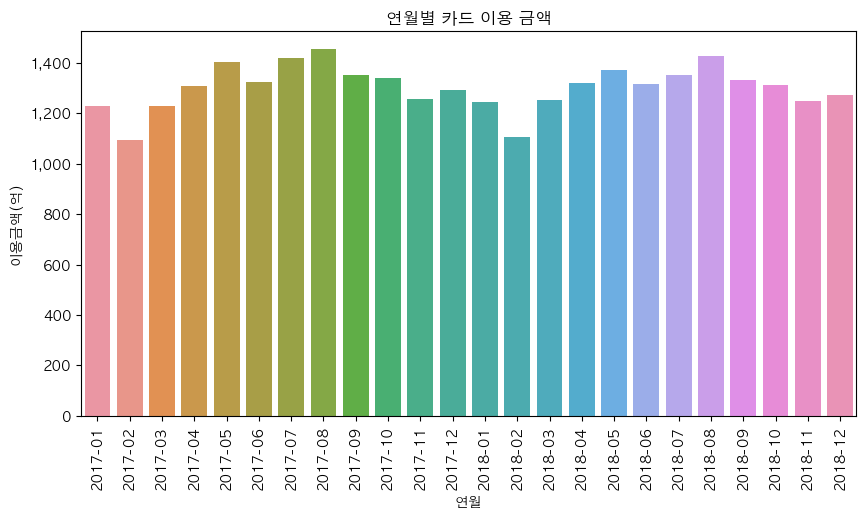

In [27]:
# 데이터들 다시 그래프로 출력
group_ym = jeju_df.groupby('연월').sum(numeric_only=True).reset_index()

sns.barplot(data=group_ym, x='연월', y='이용금액')
# x축에 있는 값들 90도로 회전
plt.xticks(rotation=90)
plt.title('연월별 카드 이용 금액')
# y축에 있는 값들을 이해하기 쉬운 형태로 출력
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

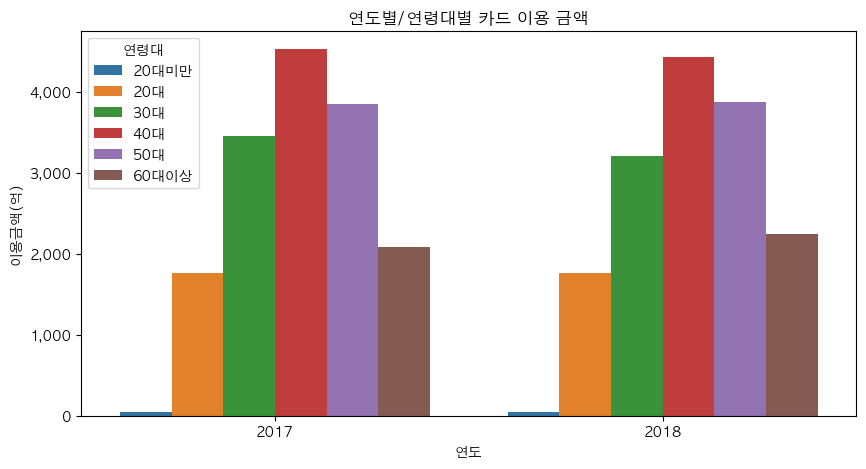

In [28]:
group_ym_age = jeju_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=group_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

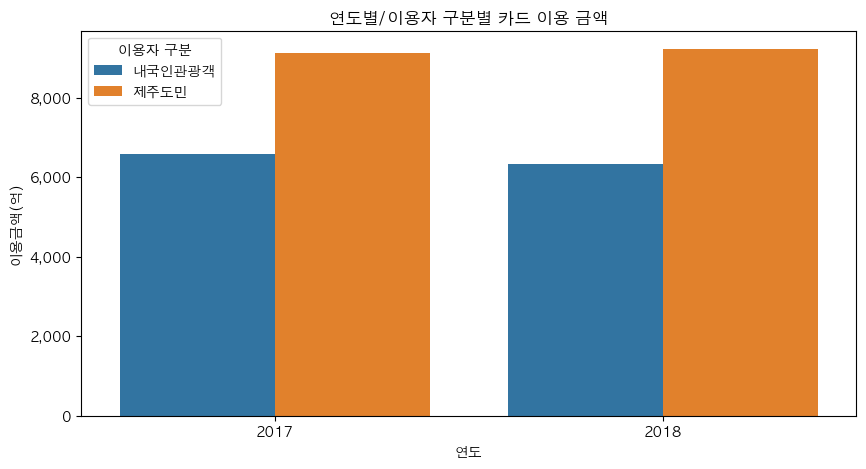

In [29]:
group_ym_user = jeju_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()

sns.barplot(data=group_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

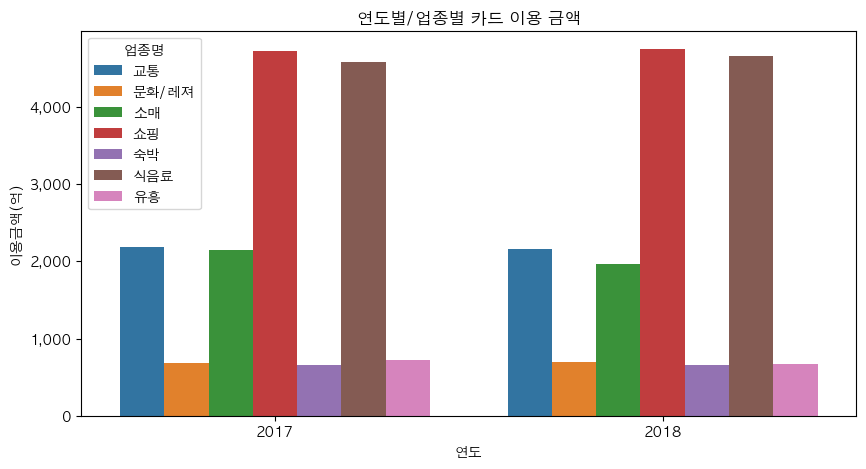

In [30]:
group_ym_market = jeju_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=group_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

# 분석: 이제 두 연도 사이에 이용금액 차이가 크게 없어 보임

In [31]:
group_age = jeju_df.groupby('연령대').sum(numeric_only=True).reset_index()
group_age

,연령대,이용자수,이용횟수,이용금액
0,20대미만,401769,879205,9478228519
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


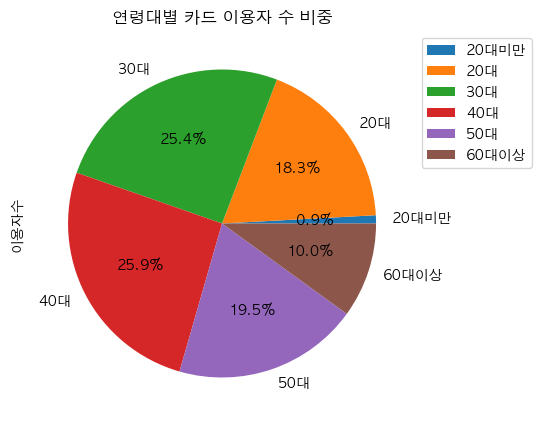

In [32]:
# 연령대별 이용수
group_age.plot(kind='pie', y='이용자수', labels=group_age['연령대'], autopct='%.1f%%') # autopct= : 각 조각이 몇 퍼센트 차지하는지 표시 ('%.1f%%'는 25.3%, 21.5% 이런 식으로 소수 첫째 자리까지 표현된 숫자 뒤에 %기호를 붙인 형태를 의미)
plt.title('연령대별 카드 이용자 수 비중')
# legend가 파이 차트와 겹치지 않게 설정
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) # 그래프 왼쪽 아래 좌표를 (0,0)이라 할때, legend의 왼쪽 상단 꼭짓점을 (1,1)지점으로 이동

# 분석: 이용자 수의 비중은 20대 미만, 60대 이상, 20대, 30대, 40대 순으로 많다

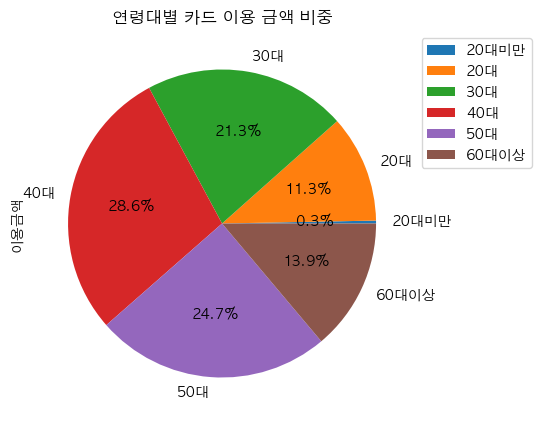

In [33]:
# 연령대별 이용 금액
group_age.plot(kind='pie', y='이용금액', labels=group_age['연령대'], autopct='%.1f%%') # autopct= : 각 조각이 몇 퍼센트 차지하는지 표시 ('%.1f%%'는 25.3%, 21.5% 이런 식으로 소수 첫째 자리까지 표현된 숫자 뒤에 %기호를 붙인 형태를 의미)
plt.title('연령대별 카드 이용 금액 비중')
# legend가 파이 차트와 겹치지 않게 설정
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) # 그래프 왼쪽 아래 좌표를 (0,0)이라 할때, legend의 왼쪽 상단 꼭짓점을 (1,1)지점으로 이동

# 분석: 20대와 30대는 이용자 수에 비해 이용 금액의 비중은 비교적 작고, 50대와 60대 이상은 이용자 수에 비해 이용 금액의 비중이 큰 것 같음

In [34]:
# 인당 이용 금액 환산
group_age['인당이용금액'] = group_age['이용금액'] / group_age['이용자수']
group_age

,연령대,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,401769,879205,9478228519,23591.239043
1,20대,8609569,17330083,352340324557,40924.269793
2,30대,11943645,23231348,665648456005,55732.438130
3,40대,12151108,25588896,894568725640,73620.341918
4,50대,9141502,18600897,771684016455,84415.451252
5,60대이상,4683296,9062038,433293299324,92518.879721


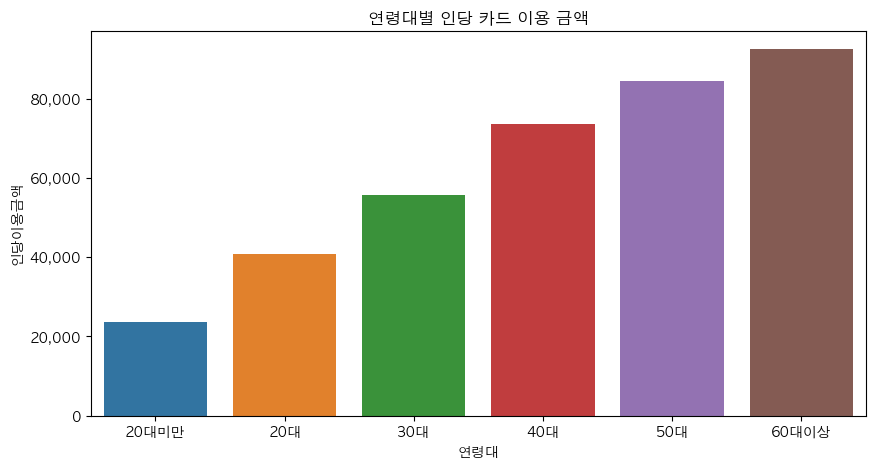

In [35]:
sns.barplot(data=group_age, x='연령대', y='인당이용금액')
plt.title("연령대별 인당 카드 이용 금액")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# 분석: 연령대가 높아질수록 인당 소비액도 더 높아짐

In [36]:
# 연령대별/업종별 이용 금액
group_age_market = jeju_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
group_age_market['인당이용금액'] = group_age_market['이용금액'] / group_age_market['이용자수']
group_age_market

,연령대,업종명,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,교통,3740,4705,285316774,76287.907487
1,20대미만,문화/레져,40499,80073,805245645,19883.099459
2,20대미만,소매,56257,77825,1638514065,29125.514425
3,20대미만,쇼핑,164635,453747,3008788954,18275.512218
4,20대미만,숙박,3681,4953,114390996,31076.065200
5,20대미만,식음료,130781,254934,3477626140,26591.218449
6,20대미만,유흥,2176,2968,148345945,68173.687960
7,20대,교통,691799,832507,45278277733,65450.047966
8,20대,문화/레져,450991,749958,12465321269,27639.844851
9,20대,소매,832913,1125058,37445127141,44956.828794


Text(0.5, 1.0, '연령대별/업종별 인당 카드 이용 금액')

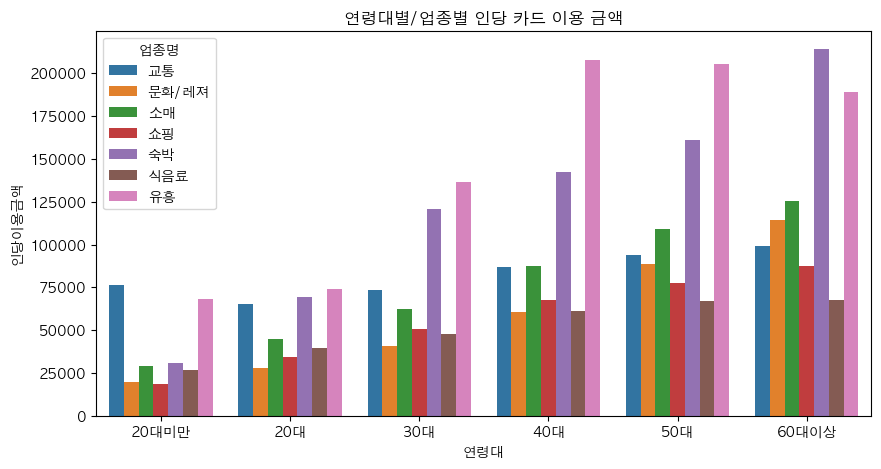

In [37]:
sns.barplot(data=group_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.title('연령대별/업종별 인당 카드 이용 금액')

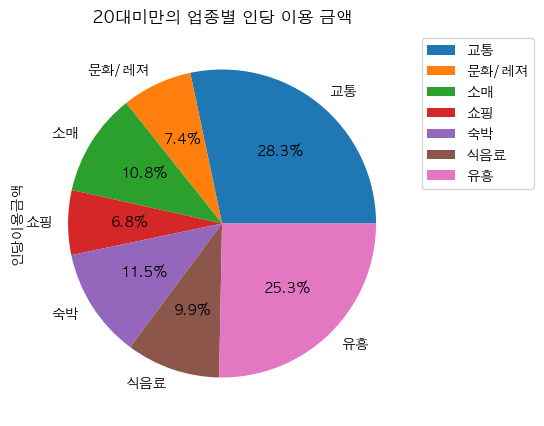

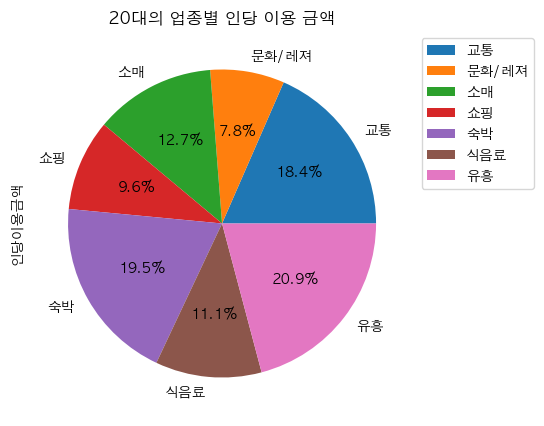

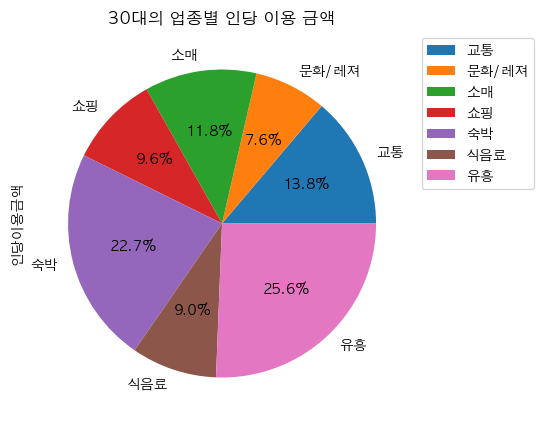

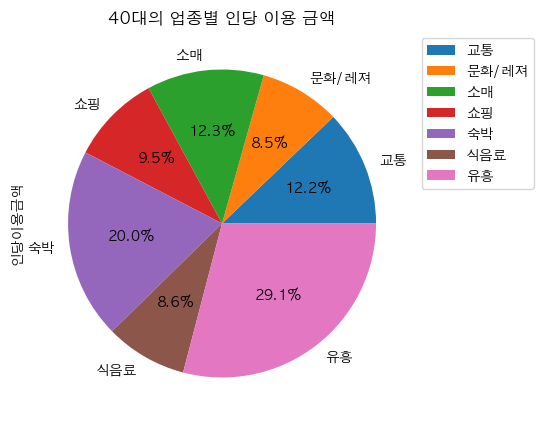

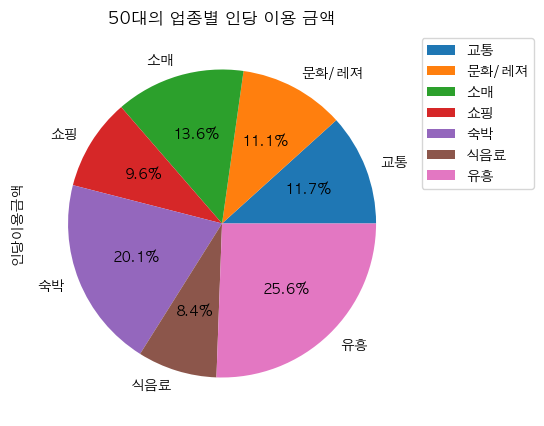

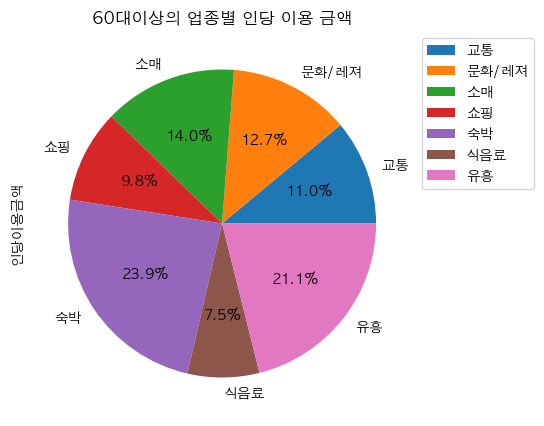

In [38]:
# 각 연령대마다 업종별 인당 이용금액 출력
for age in group_age_market['연령대'].unique():
    data = group_age_market[group_age_market['연령대'] == age]
    data.plot(kind='pie', y='인당이용금액', labels=data['업종명'], autopct='%.1f%%')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.title(f'{age}의 업종별 인당 이용 금액')
    plt.show()

In [39]:
# 연령대별/연월별 이용 금액
group_age_ym = jeju_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
group_age_ym

,연령대,연월,이용자수,이용횟수,이용금액
0,20대미만,2017-01,9309,20559,268333120
1,20대미만,2017-02,11215,23639,295809774
2,20대미만,2017-03,12917,28538,308058609
3,20대미만,2017-04,16743,34933,356994878
4,20대미만,2017-05,21319,39980,428037371
...,...,...,...,...,...
139,60대이상,2018-08,207769,431089,18101783583
140,60대이상,2018-09,208388,415272,19520727242
141,60대이상,2018-10,211715,412289,19193470928
142,60대이상,2018-11,207957,398300,19587261157


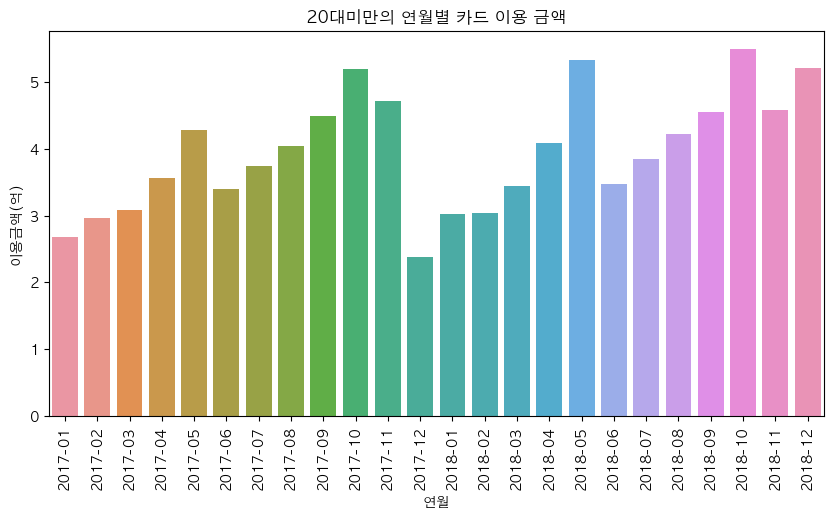

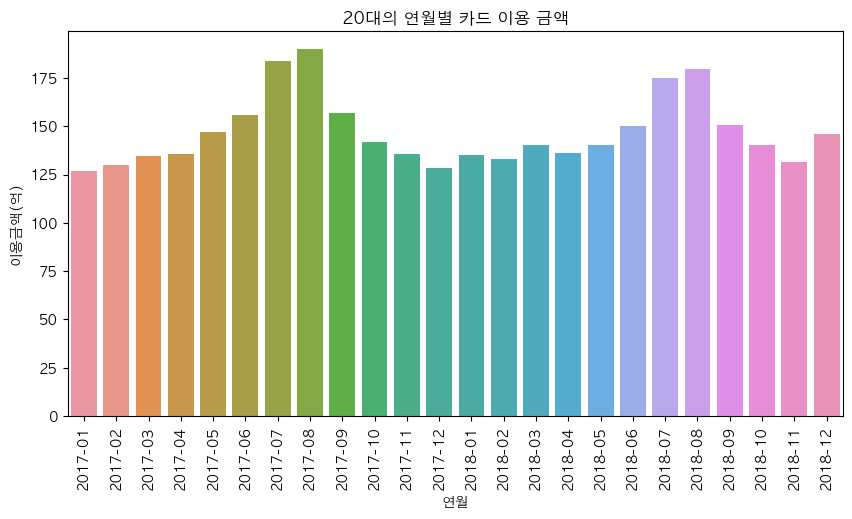

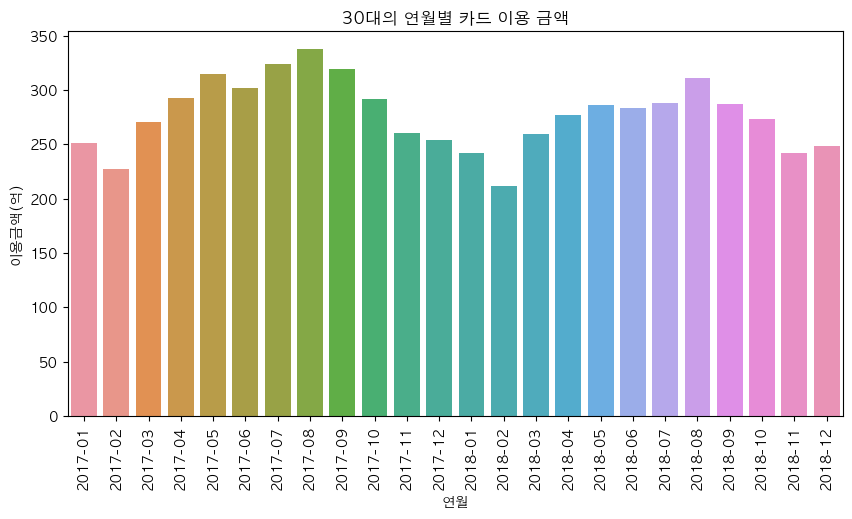

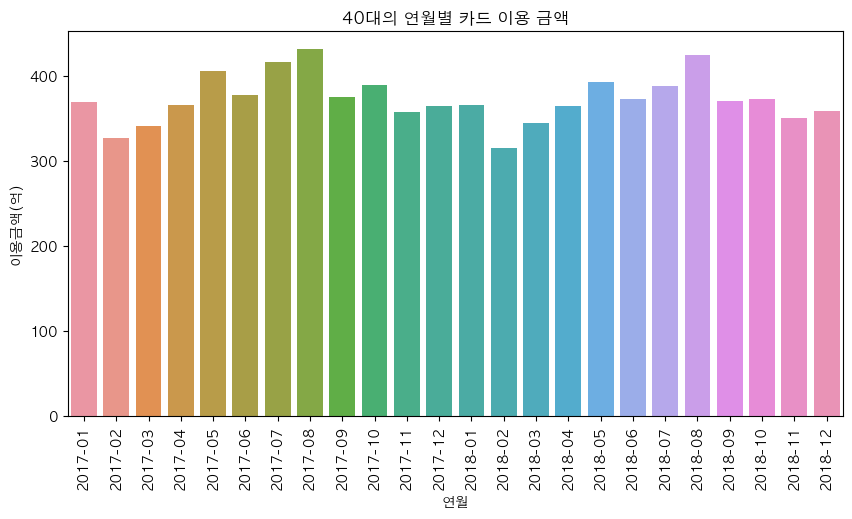

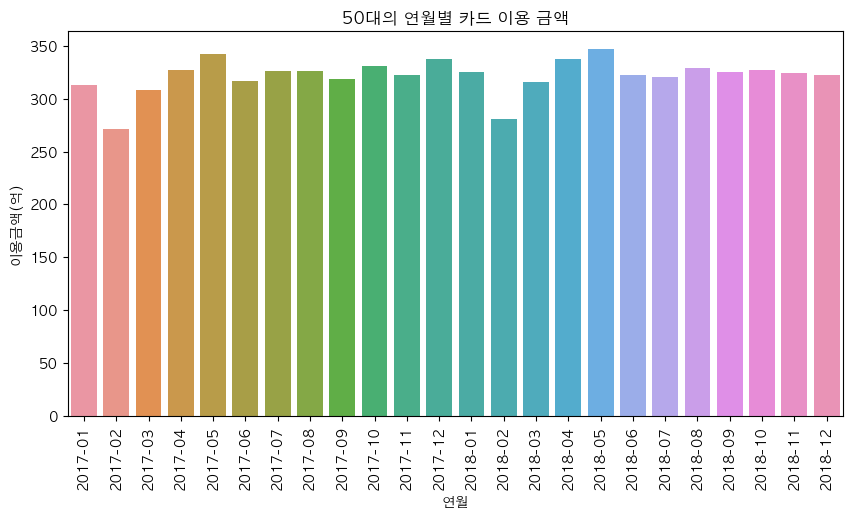

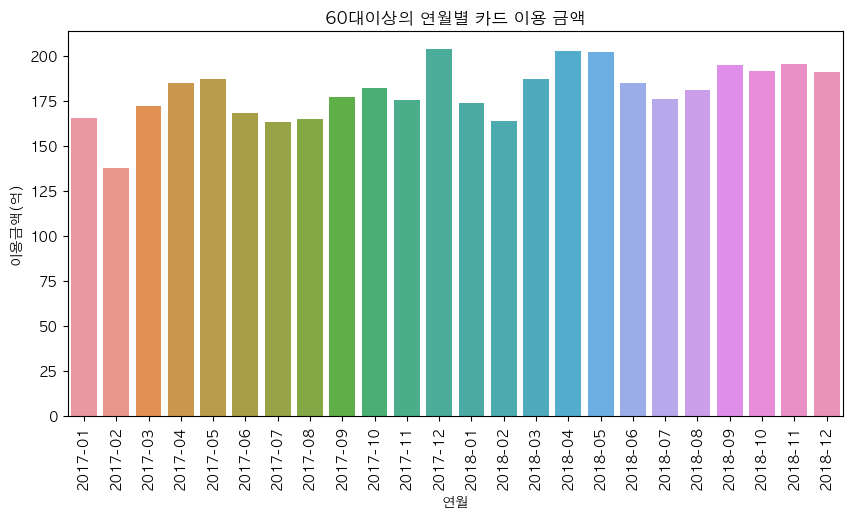

In [40]:
for age in group_age_ym['연령대'].unique():
    data = group_age_ym[group_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'{age}의 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()

# 분석: 대부분 여름휴가철인 7~8월에 이용 금액이 집중되어 있고
# 20대는 특히 7~8월에 이용 금액이 가파르게 증가. 
# 20대 미만은 5월과 10월에 이용 금액이 가장 많고, 
# 60대 이상은 여름철보다는 봄과 초겨울에 이용 금액이 더 많음 
# 50대는 비수기인 2월의 감소분을 제외하면, 다른 연령대에 비해 월별 이용 금액이 비교적 꾸준히 유지되고 있음